In [2]:
pip install xgboost

     |████████████████████████████████| 1.7 MB 9.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## 라이브러리

In [1]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
import joblib
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('df_final.xlsx')

In [4]:
df.dtypes

JOIN_SN                  int64
BTH_YR                   int64
BTH_point                int64
GENDER                   int64
OverdueAMT               int64
OverdueAMT_point         int64
OverdueCNT               int64
OverdueCNT_point         int64
CreditLoan_AMT           int64
CreditLoanAMT_point      int64
CreditLoan_CNT           int64
CreditLoanCNT_point      int64
Loan_AMT                 int64
LoanAMT_point            int64
Loan_CNT                 int64
LoanCNT_point            int64
Card_CNT                 int64
CardCNT_point            int64
CD_USG_LMT               int64
CD_USG_LMT_point         int64
CD_CA_LMT                int64
CD_CA_LMT_point          int64
CD_USG_AMT               int64
CD_USG_AMT_point         int64
CD_CA_AMT                int64
CD_CA_AMT_point          int64
만보기                      int64
만보기_point                int64
알람                       int64
알람_point                 int64
타다                       int64
패스포트 유무                  int64
타다_point

In [5]:
df.columns

Index(['JOIN_SN', 'BTH_YR', 'BTH_point', 'GENDER', 'OverdueAMT',
       'OverdueAMT_point', 'OverdueCNT', 'OverdueCNT_point', 'CreditLoan_AMT',
       'CreditLoanAMT_point', 'CreditLoan_CNT', 'CreditLoanCNT_point',
       'Loan_AMT', 'LoanAMT_point', 'Loan_CNT', 'LoanCNT_point', 'Card_CNT',
       'CardCNT_point', 'CD_USG_LMT', 'CD_USG_LMT_point', 'CD_CA_LMT',
       'CD_CA_LMT_point', 'CD_USG_AMT', 'CD_USG_AMT_point', 'CD_CA_AMT',
       'CD_CA_AMT_point', '만보기', '만보기_point', '알람', '알람_point', '타다',
       '패스포트 유무', '타다_point', 'Total_point', 'Credit_Score', '가중치', 'Label'],
      dtype='object')

In [6]:
df_main = df[['BTH_YR', 'GENDER', 'OverdueAMT', 'OverdueCNT', 'CreditLoan_AMT', 'CreditLoan_CNT', 
            'Loan_AMT', 'Loan_CNT', 'Card_CNT', 'CD_USG_LMT', 'CD_CA_LMT', 'CD_USG_AMT', 'CD_CA_AMT',
            '만보기', '알람', '타다', '패스포트 유무']]

In [7]:
label = df[['Label']]

In [8]:
df_main_n = np.array(df_main)
label_n = np.array(label)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_main_n, label_n, test_size=0.4, random_state=156)
print(X_train.shape, X_test.shape)

(28971, 17) (19314, 17)


In [10]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [11]:
params = {'max_depth' : 3,
          'eta': 0.1,
          'objective':'multi:softmax',
          'num_class' : 9,
          'eval_metric':'mlogloss',
          'early_stopping':100
          }
num_rounds = 10000

In [12]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

[01:31:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.85862	eval-mlogloss:1.85997
[1]	train-mlogloss:1.63188	eval-mlogloss:1.63462
[2]	train-mlogloss:1.45885	eval-mlogloss:1.46276
[3]	train-mlogloss:1.31942	eval-mlogloss:1.32437
[4]	train-mlogloss:1.20265	eval-mlogloss:1.20844
[5]	train-mlogloss:1.10431	eval-mlogloss:1.11085
[6]	train-mlogloss:1.01761	eval-mlogloss:1.02464
[7]	train-mlogloss:0.94382	eval-mlogloss:0.95147
[8]	train-mlogloss:0.87784	eval-mlogloss:0.88615
[9]	train-mlogloss:0.81847	eval-mlogloss:0.82733
[10]	train-mlogloss:0.76560	eval-mlogloss:0.77502
[11]	t

[154]	train-mlogloss:0.09758	eval-mlogloss:0.12808
[155]	train-mlogloss:0.09718	eval-mlogloss:0.12774
[156]	train-mlogloss:0.09661	eval-mlogloss:0.12729
[157]	train-mlogloss:0.09618	eval-mlogloss:0.12696
[158]	train-mlogloss:0.09577	eval-mlogloss:0.12666
[159]	train-mlogloss:0.09542	eval-mlogloss:0.12639
[160]	train-mlogloss:0.09500	eval-mlogloss:0.12601
[161]	train-mlogloss:0.09452	eval-mlogloss:0.12560
[162]	train-mlogloss:0.09418	eval-mlogloss:0.12533
[163]	train-mlogloss:0.09368	eval-mlogloss:0.12497
[164]	train-mlogloss:0.09328	eval-mlogloss:0.12467
[165]	train-mlogloss:0.09281	eval-mlogloss:0.12427
[166]	train-mlogloss:0.09248	eval-mlogloss:0.12401
[167]	train-mlogloss:0.09207	eval-mlogloss:0.12361
[168]	train-mlogloss:0.09176	eval-mlogloss:0.12338
[169]	train-mlogloss:0.09143	eval-mlogloss:0.12314
[170]	train-mlogloss:0.09095	eval-mlogloss:0.12272
[171]	train-mlogloss:0.09056	eval-mlogloss:0.12241
[172]	train-mlogloss:0.09023	eval-mlogloss:0.12213
[173]	train-mlogloss:0.08991	ev

[315]	train-mlogloss:0.05767	eval-mlogloss:0.09789
[316]	train-mlogloss:0.05752	eval-mlogloss:0.09779
[317]	train-mlogloss:0.05740	eval-mlogloss:0.09771
[318]	train-mlogloss:0.05725	eval-mlogloss:0.09761
[319]	train-mlogloss:0.05711	eval-mlogloss:0.09753
[320]	train-mlogloss:0.05696	eval-mlogloss:0.09741
[321]	train-mlogloss:0.05680	eval-mlogloss:0.09730
[322]	train-mlogloss:0.05667	eval-mlogloss:0.09719
[323]	train-mlogloss:0.05649	eval-mlogloss:0.09702
[324]	train-mlogloss:0.05636	eval-mlogloss:0.09696
[325]	train-mlogloss:0.05625	eval-mlogloss:0.09690
[326]	train-mlogloss:0.05612	eval-mlogloss:0.09681
[327]	train-mlogloss:0.05602	eval-mlogloss:0.09675
[328]	train-mlogloss:0.05586	eval-mlogloss:0.09666
[329]	train-mlogloss:0.05575	eval-mlogloss:0.09660
[330]	train-mlogloss:0.05563	eval-mlogloss:0.09652
[331]	train-mlogloss:0.05550	eval-mlogloss:0.09647
[332]	train-mlogloss:0.05537	eval-mlogloss:0.09636
[333]	train-mlogloss:0.05525	eval-mlogloss:0.09632
[334]	train-mlogloss:0.05512	ev

[476]	train-mlogloss:0.04067	eval-mlogloss:0.08745
[477]	train-mlogloss:0.04060	eval-mlogloss:0.08742
[478]	train-mlogloss:0.04054	eval-mlogloss:0.08739
[479]	train-mlogloss:0.04047	eval-mlogloss:0.08738
[480]	train-mlogloss:0.04039	eval-mlogloss:0.08732
[481]	train-mlogloss:0.04034	eval-mlogloss:0.08732
[482]	train-mlogloss:0.04027	eval-mlogloss:0.08730
[483]	train-mlogloss:0.04019	eval-mlogloss:0.08725
[484]	train-mlogloss:0.04011	eval-mlogloss:0.08719
[485]	train-mlogloss:0.04005	eval-mlogloss:0.08714
[486]	train-mlogloss:0.03998	eval-mlogloss:0.08709
[487]	train-mlogloss:0.03989	eval-mlogloss:0.08703
[488]	train-mlogloss:0.03981	eval-mlogloss:0.08700
[489]	train-mlogloss:0.03976	eval-mlogloss:0.08697
[490]	train-mlogloss:0.03968	eval-mlogloss:0.08690
[491]	train-mlogloss:0.03959	eval-mlogloss:0.08684
[492]	train-mlogloss:0.03953	eval-mlogloss:0.08684
[493]	train-mlogloss:0.03945	eval-mlogloss:0.08679
[494]	train-mlogloss:0.03937	eval-mlogloss:0.08676
[495]	train-mlogloss:0.03927	ev

[637]	train-mlogloss:0.03068	eval-mlogloss:0.08229
[638]	train-mlogloss:0.03063	eval-mlogloss:0.08225
[639]	train-mlogloss:0.03057	eval-mlogloss:0.08219
[640]	train-mlogloss:0.03054	eval-mlogloss:0.08218
[641]	train-mlogloss:0.03049	eval-mlogloss:0.08216
[642]	train-mlogloss:0.03045	eval-mlogloss:0.08215
[643]	train-mlogloss:0.03040	eval-mlogloss:0.08214
[644]	train-mlogloss:0.03036	eval-mlogloss:0.08213
[645]	train-mlogloss:0.03031	eval-mlogloss:0.08212
[646]	train-mlogloss:0.03027	eval-mlogloss:0.08211
[647]	train-mlogloss:0.03021	eval-mlogloss:0.08210
[648]	train-mlogloss:0.03016	eval-mlogloss:0.08211
[649]	train-mlogloss:0.03010	eval-mlogloss:0.08210
[650]	train-mlogloss:0.03005	eval-mlogloss:0.08208
[651]	train-mlogloss:0.03000	eval-mlogloss:0.08206
[652]	train-mlogloss:0.02995	eval-mlogloss:0.08204
[653]	train-mlogloss:0.02990	eval-mlogloss:0.08201
[654]	train-mlogloss:0.02987	eval-mlogloss:0.08199
[655]	train-mlogloss:0.02982	eval-mlogloss:0.08197
[656]	train-mlogloss:0.02979	ev

[798]	train-mlogloss:0.02397	eval-mlogloss:0.08018
[799]	train-mlogloss:0.02394	eval-mlogloss:0.08019
[800]	train-mlogloss:0.02390	eval-mlogloss:0.08016
[801]	train-mlogloss:0.02387	eval-mlogloss:0.08013
[802]	train-mlogloss:0.02383	eval-mlogloss:0.08013
[803]	train-mlogloss:0.02379	eval-mlogloss:0.08011
[804]	train-mlogloss:0.02377	eval-mlogloss:0.08010
[805]	train-mlogloss:0.02372	eval-mlogloss:0.08008
[806]	train-mlogloss:0.02368	eval-mlogloss:0.08008
[807]	train-mlogloss:0.02365	eval-mlogloss:0.08007
[808]	train-mlogloss:0.02362	eval-mlogloss:0.08006
[809]	train-mlogloss:0.02359	eval-mlogloss:0.08005
[810]	train-mlogloss:0.02356	eval-mlogloss:0.08006
[811]	train-mlogloss:0.02352	eval-mlogloss:0.08005
[812]	train-mlogloss:0.02349	eval-mlogloss:0.08004
[813]	train-mlogloss:0.02346	eval-mlogloss:0.08002
[814]	train-mlogloss:0.02342	eval-mlogloss:0.08001
[815]	train-mlogloss:0.02339	eval-mlogloss:0.07998
[816]	train-mlogloss:0.02336	eval-mlogloss:0.07996
[817]	train-mlogloss:0.02333	ev

[959]	train-mlogloss:0.01925	eval-mlogloss:0.07893
[960]	train-mlogloss:0.01923	eval-mlogloss:0.07893
[961]	train-mlogloss:0.01920	eval-mlogloss:0.07892
[962]	train-mlogloss:0.01917	eval-mlogloss:0.07893
[963]	train-mlogloss:0.01915	eval-mlogloss:0.07892
[964]	train-mlogloss:0.01912	eval-mlogloss:0.07891
[965]	train-mlogloss:0.01909	eval-mlogloss:0.07890
[966]	train-mlogloss:0.01907	eval-mlogloss:0.07888
[967]	train-mlogloss:0.01905	eval-mlogloss:0.07890
[968]	train-mlogloss:0.01902	eval-mlogloss:0.07890
[969]	train-mlogloss:0.01900	eval-mlogloss:0.07891
[970]	train-mlogloss:0.01897	eval-mlogloss:0.07888
[971]	train-mlogloss:0.01895	eval-mlogloss:0.07886
[972]	train-mlogloss:0.01893	eval-mlogloss:0.07884
[973]	train-mlogloss:0.01891	eval-mlogloss:0.07885
[974]	train-mlogloss:0.01888	eval-mlogloss:0.07882
[975]	train-mlogloss:0.01885	eval-mlogloss:0.07880
[976]	train-mlogloss:0.01883	eval-mlogloss:0.07880
[977]	train-mlogloss:0.01880	eval-mlogloss:0.07878
[978]	train-mlogloss:0.01878	ev

[1118]	train-mlogloss:0.01572	eval-mlogloss:0.07864
[1119]	train-mlogloss:0.01571	eval-mlogloss:0.07864
[1120]	train-mlogloss:0.01569	eval-mlogloss:0.07866
[1121]	train-mlogloss:0.01566	eval-mlogloss:0.07867
[1122]	train-mlogloss:0.01565	eval-mlogloss:0.07866
[1123]	train-mlogloss:0.01563	eval-mlogloss:0.07867
[1124]	train-mlogloss:0.01561	eval-mlogloss:0.07868
[1125]	train-mlogloss:0.01558	eval-mlogloss:0.07868
[1126]	train-mlogloss:0.01556	eval-mlogloss:0.07870
[1127]	train-mlogloss:0.01554	eval-mlogloss:0.07870
[1128]	train-mlogloss:0.01552	eval-mlogloss:0.07871
[1129]	train-mlogloss:0.01550	eval-mlogloss:0.07869
[1130]	train-mlogloss:0.01549	eval-mlogloss:0.07869
[1131]	train-mlogloss:0.01547	eval-mlogloss:0.07869
[1132]	train-mlogloss:0.01545	eval-mlogloss:0.07868
[1133]	train-mlogloss:0.01543	eval-mlogloss:0.07869
[1134]	train-mlogloss:0.01541	eval-mlogloss:0.07870
[1135]	train-mlogloss:0.01540	eval-mlogloss:0.07870
[1136]	train-mlogloss:0.01538	eval-mlogloss:0.07869
[1137]	train

In [13]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:100],3))

preds = []
for i in pred_probs :
    if i < 1 :
        preds.append(0)
        #preds = 0
    elif i >= 1 and i < 2 :
        preds.append(1)
        #preds = 1
    elif i >=2 and i < 3 :
        preds.append(2)
        #preds = 2
    elif i >=3 and i < 4 :
        preds.append(3)
        #preds = 3
    elif i >=4 and i < 5 :
        preds.append(4)
        #preds = 4
    elif i >=5 and i < 6 :
        preds.append(5)
        #preds = 5
    elif i >=6 and i < 7 :
        preds.append(6)
        #preds = 6
    elif i >=7 and i < 8 :
        preds.append(7)
        #preds = 7
    else :
        preds.append(8)
        #preds = 8  
        
print(preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[4. 6. 6. 4. 4. 4. 4. 5. 4. 4. 4. 6. 4. 7. 5. 6. 4. 4. 4. 6. 4. 4. 4. 4.
 4. 4. 4. 4. 5. 4. 4. 6. 4. 4. 4. 5. 6. 4. 4. 4. 4. 6. 4. 5. 4. 3. 3. 5.
 4. 4. 4. 4. 6. 3. 5. 5. 4. 6. 4. 4. 6. 6. 2. 4. 6. 4. 5. 6. 4. 6. 4. 7.
 4. 6. 4. 4. 4. 6. 4. 4. 5. 4. 4. 5. 6. 6. 3. 6. 4. 4. 4. 4. 4. 4. 4. 3.
 3. 4. 6. 4.]
[4, 6, 6, 4, 4, 4, 4, 5, 4, 4]


In [14]:
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    F1 = f1_score(y_test, y_pred, average='macro')
    #AUC = roc_auc_score(y_test, y_pred, average = 'macro', multi_class="ovr")
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    #print('AUC: {:.4f}'.format(AUC))

In [15]:
get_clf_eval(y_test, preds)

오차행렬:
 [[    2     5     0     0     0     0     0     0     0]
 [    0    16    11     0     0     0     0     0     0]
 [    0     8   100    23     0     0     0     0     0]
 [    0     2    11  1328    63     0     0     0     0]
 [    0     0     1    28 12004    77     1     1     0]
 [    0     0     1     0    57  2776    76     0     0]
 [    0     0     0     0     0    81  2076    27     0]
 [    0     0     0     0     0     0    52   486     0]
 [    0     0     0     0     0     0     0     1     0]]

정확도: 0.9728
정밀도: 0.7897
재현율: 0.7096
F1: 0.7272


In [16]:
joblib.dump(xgb_model, 'saved_model.pkl')

#model = joblib.load('saved_model.pkl')

['saved_model.pkl']

## 내 신용도 알아보기

In [14]:
def check_data():
    new_df = pd.DataFrame(columns=range(17))
    
    BTH = int(input("생년월일을 입력하세요:"))
    GENDER = input("성별을 입력하세요(남자,여자):")
    if GENDER == "남자" :
        gender = 1
    else :
        gender = 2
    OverdueAMT = int(input("연체금액 : "))
    OverdueCNT = int(input("연체횟수 : "))
    CreditLoan_AMT = int(input("신용카드대출금액 : "))
    CreditLoan_CNT = int(input("신용카드대출횟수 : "))
    Loan_AMT = int(input("대부대출금액 : "))
    Loan_CNT = int(input("대부대출횟수 : "))
    Card_CNT = int(input("카드 갯수 : "))
    CD_USG_LMT = int(input("신용카드한도 : "))
    CD_CA_LMT = int(input("현금서비스한도 : "))
    CD_USG_AMT = int(input("신용카드총이용금액 : "))
    CD_CA_AMT = int(input("현금서비스총이용금액 : "))
    만보기 = int(input("만보기 : "))
    알람 = int(input("알람 : "))
    타다 = int(input("타다 : "))
    패스포트_유무 = input("패스포트(유,무)")
    if 패스포트_유무 == "유" :
        yes = 1
    else :
        yes = 0
        
    new_df.loc[0] = [BTH,gender,OverdueAMT,OverdueCNT,CreditLoan_AMT,CreditLoan_CNT,Loan_AMT,
                    Loan_CNT,Card_CNT,CD_USG_LMT,CD_CA_LMT,CD_USG_AMT,CD_CA_AMT,만보기,알람,타다,yes]
    
    xgb_model = joblib.load('saved_model.pkl')
    new_df_n = np.array(new_df)
    dtest = xgb.DMatrix(new_df_n)
    pred_probs = xgb_model.predict(dtest)
    

    for i in pred_probs :
        if i < 1 :
            preds = 1
        elif i >= 1 and i < 2 :
            preds = 2
        elif i >=2 and i < 3 :
            preds = 3
        elif i >=3 and i < 4 :
            preds = 4
        elif i >=4 and i < 5 :
            preds = 5
        elif i >=5 and i < 6 :
            preds = 6
        elif i >=6 and i < 7 :
            preds = 7
        elif i >=7 and i < 8 :
            preds = 8
        else :
            preds = 9
    
    print("당신의 신용등급은 %d 등급 입니다." %preds)
            

    return new_df

new_df = check_data()

생년월일을 입력하세요:1987
성별을 입력하세요(남자,여자):여자
연체금액 : 0
연체횟수 : 0
신용카드대출금액 : 6960
신용카드대출횟수 : 0
대부대출금액 : 0
대부대출횟수 : 0
카드 갯수 : 82
신용카드한도 : 2460000
현금서비스한도 : 1313000
신용카드총이용금액 : 95670
현금서비스총이용금액 : 4400
만보기 : 3203
알람 : 5
타다 : 4
패스포트(유,무)유
당신의 신용등급은 8 등급 입니다.


In [66]:
xgb_model = joblib.load('saved_model.pkl')
new_df_n = np.array(new_df)
dtest = xgb.DMatrix(new_df_n)
pred_probs = xgb_model.predict(dtest)


In [67]:
pred_probs

array([7.], dtype=float32)

In [13]:
# tkinter를 사용하기 위한 import
from tkinter import *
from tkinter import ttk

# tkinter 객체 생성
window = Tk()

# 사용자 id와 password를 저장하는 변수 생성
BTH_YR = IntVar()
GENDER = StringVar()
OverdueAMT = IntVar()
OverdueCNT = IntVar()
CreditLoan_AMT = IntVar()
CreditLoan_CNT = IntVar()
Loan_AMT = IntVar()
Loan_CNT = IntVar()
Card_CNT = IntVar()
CD_USG_LMT = IntVar()
CD_CA_LMT = IntVar()
CD_USG_AMT = IntVar()
CD_CA_AMT = IntVar()
만보기 = IntVar()
알람 = IntVar()
타다 = IntVar()
패스포트_유무 = StringVar()

def close():
    window.destory()


    
# 사용자 id와 password를 비교하는 함수
def check_data():
    new_df = pd.DataFrame(columns=range(17))
    
    BTH = BTH_YR.get()
    GENDER = GENDER.get()
    if GENDER == "남자" :
        gender = 1
    else :
        gender = 2
    OverdueAMT = OverdueAMT.get()
    OverdueCNT = OverdueCNT.get()
    CreditLoan_AMT = CreditLoan_AMT.get()
    CreditLoan_CNT = CreditLoan_CNT.get()
    Loan_AMT = Loan_AMT.get()
    Loan_CNT = Loan_CNT.get()
    Card_CNT = Card_CNT.get()
    CD_USG_LMT = CD_USG_LMT.get()
    CD_CA_LMT = CD_CA_LMT.get()
    CD_USG_AMT = CD_USG_AMT.get()
    CD_CA_AMT = CD_CA_AMT.get()
    만보기 = 만보기.get()
    알람 = 알람.get()
    타다 = 타다.get()
    패스포트_유무 = 패스포트_유무.get()
    if 패스포트_유무 == "유" :
        yes = 1
    else :
        yes = 0

    new_df.loc[0] = [BTH,gender,OverdueAMT,OverdueCNT,CreditLoan_AMT,CreditLoan_CNT,Loan_AMT,
                    Loan_CNT,Card_CNT,CD_USG_LMT,CD_CA_LMT,CD_USG_AMT,CD_CA_AMT,만보기,알람,타다,yes]

    '''new_df['BTH_YR'] = BTH_YR.get()
    if GENDER.get() == "남자" :
        new_df['GENDER'] = 1
    else :
        new_df['GENDER'] = 2
    new_df['OverdueAMT'] = OverdueAMT.get()
    new_df['OverdueCNT'] = OverdueCNT.get()
    new_df['CreditLoan_AMT'] = CreditLoan_AMT.get()
    new_df['CreditLoan_CNT'] = CreditLoan_CNT.get()
    new_df['Loan_AMT'] = Loan_AMT.get()
    new_df['Loan_CNT'] = Loan_CNT.get()
    new_df['Card_CNT'] = Card_CNT.get()
    new_df['CD_USG_LMT'] = CD_USG_LMT.get()
    new_df['CD_CA_LMT'] = CD_CA_LMT.get()
    new_df['CD_USG_AMT'] = CD_USG_AMT.get()
    new_df['CD_CA_AMT'] = CD_CA_LMT.get()
    new_df['만보기'] = 만보기.get()
    new_df['알람'] = 알람.get()
    new_df['타다'] = 타다.get()
    if 패스포트_유무.get() == "유" :
        new_df['패스포트 유무'] = 1
    else :
        new_df['패스포트 유무'] = 0
        
    return new_df'''
    

# id와 password, 그리고 확인 버튼의 UI를 만드는 부분
ttk.Label(window, text = "생년월일을 입력하세요 : ").grid(row = 0, column = 0, padx = 10, pady = 10)
#ttk.Button(window, text = "입력", command = check_data).grid(row = 0, column = 2, padx = 10, pady = 10)
ttk.Label(window, text = "성별을 입력하세요(남자,여자) : ").grid(row = 1, column = 0, padx = 10, pady = 10)
#ttk.Button(window, text = "입력", command = check_data).grid(row = 1, column = 2, padx = 10, pady = 10)
ttk.Label(window, text = "연체금액 : ").grid(row = 2, column = 0, padx = 10, pady = 10)
#ttk.Button(window, text = "입력", command = check_data).grid(row = 2, column = 2, padx = 10, pady = 10)
ttk.Label(window, text = "연체횟수 : ").grid(row = 3, column = 0, padx = 10, pady = 10)
#ttk.Button(window, text = "입력", command = check_data).grid(row = 3, column = 2, padx = 10, pady = 10)
ttk.Label(window, text = "신용카드대출금액 : ").grid(row = 4, column = 0, padx = 10, pady = 10)
#ttk.Button(window, text = "입력", command = check_data).grid(row = 4, column = 2, padx = 10, pady = 10)
ttk.Label(window, text = "신용카드대출횟수 : ").grid(row = 5, column = 0, padx = 10, pady = 10)
#ttk.Button(window, text = "입력", command = check_data).grid(row = 5, column = 2, padx = 10, pady = 10)
ttk.Label(window, text = "대부대출금액 : ").grid(row = 6, column = 0, padx = 10, pady = 10)
#ttk.Button(window, text = "입력", command = check_data).grid(row = 6, column = 2, padx = 10, pady = 10)
ttk.Label(window, text = "대부대출횟수 : ").grid(row = 7, column = 0, padx = 10, pady = 10)
#ttk.Button(window, text = "입력", command = check_data).grid(row = 7, column = 2, padx = 10, pady = 10)
ttk.Label(window, text = "카드갯수 : ").grid(row = 8, column = 0, padx = 10, pady = 10)
#ttk.Button(window, text = "입력", command = check_data).grid(row = 8, column = 2, padx = 10, pady = 10)
ttk.Label(window, text = "신용카드한도 : ").grid(row = 9, column = 0, padx = 10, pady = 10)
#ttk.Button(window, text = "입력", command = check_data).grid(row = 9, column = 2, padx = 10, pady = 10)
ttk.Label(window, text = "현금서비스한도 : ").grid(row = 10, column = 0, padx = 10, pady = 10)
#ttk.Button(window, text = "입력", command = check_data).grid(row = 10, column = 2, padx = 10, pady = 10)
ttk.Label(window, text = "신용카드총이용금액 : ").grid(row = 11, column = 0, padx = 10, pady = 10)
#ttk.Button(window, text = "입력", command = check_data).grid(row = 11, column = 2, padx = 10, pady = 10)
ttk.Label(window, text = "현금서비스총이용금액 : ").grid(row = 12, column = 0, padx = 10, pady = 10)
#ttk.Button(window, text = "입력", command = check_data).grid(row = 12, column = 2, padx = 10, pady = 10)
ttk.Label(window, text = "만보기 : ").grid(row = 13, column = 0, padx = 10, pady = 10)
#ttk.Button(window, text = "입력", command = check_data).grid(row = 13, column = 2, padx = 10, pady = 10)
ttk.Label(window, text = "알람 : ").grid(row = 14, column = 0, padx = 10, pady = 10)
#ttk.Button(window, text = "입력", command = check_data).grid(row = 14, column = 2, padx = 10, pady = 10)
ttk.Label(window, text = "타다(유,무) : ").grid(row = 15, column = 0, padx = 10, pady = 10)
#ttk.Button(window, text = "입력", command = check_data).grid(row = 15, column = 2, padx = 10, pady = 10)
ttk.Entry(window, textvariable = BTH_YR).grid(row = 0, column = 1, padx = 10, pady = 10)
ttk.Entry(window, textvariable = GENDER).grid(row = 1, column = 1, padx = 10, pady = 10)
ttk.Entry(window, textvariable = OverdueAMT).grid(row = 2, column = 1, padx = 10, pady = 10)
ttk.Entry(window, textvariable = OverdueCNT).grid(row = 3, column = 1, padx = 10, pady = 10)
ttk.Entry(window, textvariable = CreditLoan_AMT).grid(row = 4, column = 1, padx = 10, pady = 10)
ttk.Entry(window, textvariable = CreditLoan_CNT).grid(row = 5, column = 1, padx = 10, pady = 10)
ttk.Entry(window, textvariable = Loan_AMT).grid(row = 6, column = 1, padx = 10, pady = 10)
ttk.Entry(window, textvariable = Loan_CNT).grid(row = 7, column = 1, padx = 10, pady = 10)
ttk.Entry(window, textvariable = Card_CNT).grid(row = 8, column = 1, padx = 10, pady = 10)
ttk.Entry(window, textvariable = CD_USG_LMT).grid(row = 9, column = 1, padx = 10, pady = 10)
ttk.Entry(window, textvariable = CD_CA_LMT).grid(row = 10, column = 1, padx = 10, pady = 10)
ttk.Entry(window, textvariable = CD_USG_AMT).grid(row = 11, column = 1, padx = 10, pady = 10)
ttk.Entry(window, textvariable = 만보기).grid(row = 12, column = 1, padx = 10, pady = 10)
ttk.Entry(window, textvariable = 알람).grid(row = 13, column = 1, padx = 10, pady = 10)
ttk.Entry(window, textvariable = 타다).grid(row = 14, column = 1, padx = 10, pady = 10)
ttk.Entry(window, textvariable = 패스포트_유무).grid(row = 15, column = 1, padx = 10, pady = 10)
ttk.Button(window, text = "입력", command = check_data).grid(row = 16, column = 0, padx = 10, pady = 10)
ttk.Button(window, text = "제출", command = close).grid(row = 16, column = 2, padx = 10, pady = 10)

window.mainloop()

xgb_model = joblib.load('saved_model.pkl')
new_df_n = np.array(new_df)
dtest = xgb.DMatrix(new_df_n)
pred_probs = xgb_model.predict(dtest)
    

for i in pred_probs :
    if i < 1 :
        preds = 1
    elif i >= 1 and i < 2 :
        preds = 2
    elif i >=2 and i < 3 :
        preds = 3
    elif i >=3 and i < 4 :
        preds = 4
    elif i >=4 and i < 5 :
        preds = 5
    elif i >=5 and i < 6 :
        preds = 6
    elif i >=6 and i < 7 :
        preds = 7
    elif i >=7 and i < 8 :
        preds = 8
    else :
        preds = 9

print("당신의 신용등급은 %d 등급 입니다." %preds)


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/anjaeu/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_884/986603906.py", line 37, in check_data
    GENDER = GENDER.get()
UnboundLocalError: local variable 'GENDER' referenced before assignment
Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/anjaeu/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_884/986603906.py", line 28, in close
    window.destory()
  File "/Users/anjaeu/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 2354, in __getattr__
    return getattr(self.tk, attr)
AttributeError: '_tkinter.tkapp' object has no attribute 'destory'


당신의 신용등급은 3 등급 입니다.


In [2]:
xgb_model = joblib.load('saved_model.pkl')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

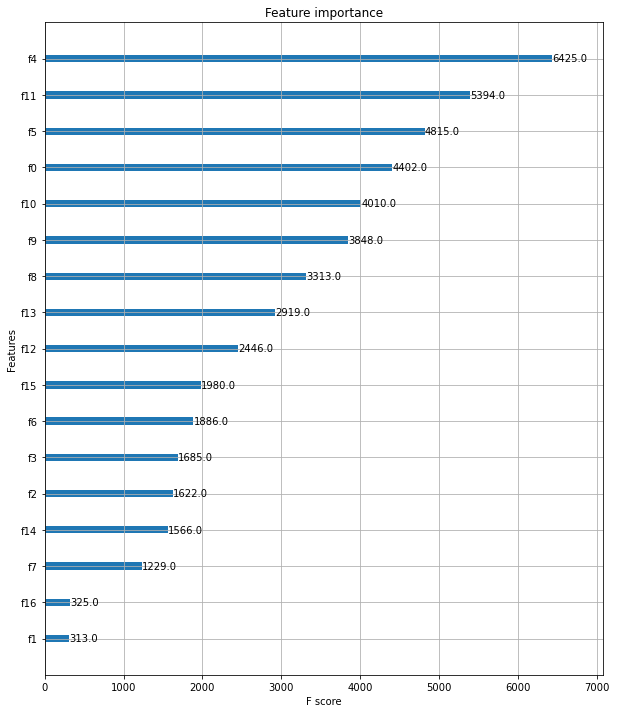

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(xgb_model, ax = ax)

In [61]:
import xgboost as xgb
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score


# split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(df_main_n, label_n, test_size=0.3, random_state=123)

# create XGBoost instance with default hyper-parameters
xgb_estimator = xgb.XGBClassifier(objective='binary:logistic')

# create MultiOutputClassifier instance with XGBoost model inside
multilabel_model = MultiOutputClassifier(xgb_estimator)

# fit the model
multilabel_model.fit(X_train, y_train)

# evaluate on test data
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, multilabel_model.predict(X_test))*100))

Accuracy on test data: 97.2%
